# Statistical Inference

In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/us_indicators.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [3]:
df

,date,cpi,policy_rate,neer,money_supply,inflation_target,type_of_monetary_policy
0,2001-01-31,1.32,1.5,89.24,147.07,inrange,ease
1,2001-02-28,1.44,1.5,90.47,145.49,inrange,ease
2,2001-03-31,1.44,1.5,89.33,140.02,inrange,ease
3,2001-04-30,2.52,1.5,87.32,138.88,inrange,ease
4,2001-05-31,2.76,1.5,87.16,139.49,inrange,ease
...,...,...,...,...,...,...,...
277,2024-02-29,-0.77,2.5,118.51,718.27,outrrange,tight
278,2024-03-31,-0.47,2.5,118.11,711.58,outrrange,tight
279,2024-04-30,0.19,2.5,116.80,695.69,outrrange,tight
280,2024-05-31,1.54,2.5,117.21,702.68,inrange,tight


## Tests

### T-Test

In [4]:
money_supply_inrange = df[df['inflation_target'] == 'inrange']['money_supply']
money_supply_outrrange = df[df['inflation_target'] == 'outrrange']['money_supply']
t_stat, p_value = st.ttest_ind(money_supply_inrange, money_supply_outrrange)

In [5]:
print(f"T-Test Results:\n   T-Statistic: {t_stat}\n   P-Value: {p_value}")

T-Test Results:
   T-Statistic: -3.0762948318033585
   P-Value: 0.002303304806832142


### Chi-Square

In [6]:
contingency_table = pd.crosstab(df['inflation_target'], df['type_of_monetary_policy'])
chi2_stat, p_value, dof, expected = st.chi2_contingency(contingency_table)

In [7]:
print(f"Chi-Square Test Results:\n   Chi2 Statistic: {chi2_stat}\n   P-Value: {p_value}\n")

Chi-Square Test Results:
   Chi2 Statistic: 0.46833140225787323
   P-Value: 0.4937558046674232



### Pearson

In [8]:
coef, p_value = st.pearsonr(df['cpi'], df['neer'])

In [9]:
print(f"Pearson Correlation Results:\n   Correlation Coefficient: {coef}\n   P-Value: {p_value}")

Pearson Correlation Results:
   Correlation Coefficient: -0.31793859350711884
   P-Value: 4.8248207969110485e-08


#### Correlation Matrix

In [10]:
corr_df = df[['cpi', 'policy_rate', 'neer', 'money_supply']].corr()

In [11]:
corr_df

,cpi,policy_rate,neer,money_supply
cpi,1.000000,0.409506,-0.317939,-0.239998
policy_rate,0.409506,1.000000,-0.430170,-0.446686
neer,-0.317939,-0.430170,1.000000,0.962318
money_supply,-0.239998,-0.446686,0.962318,1.000000


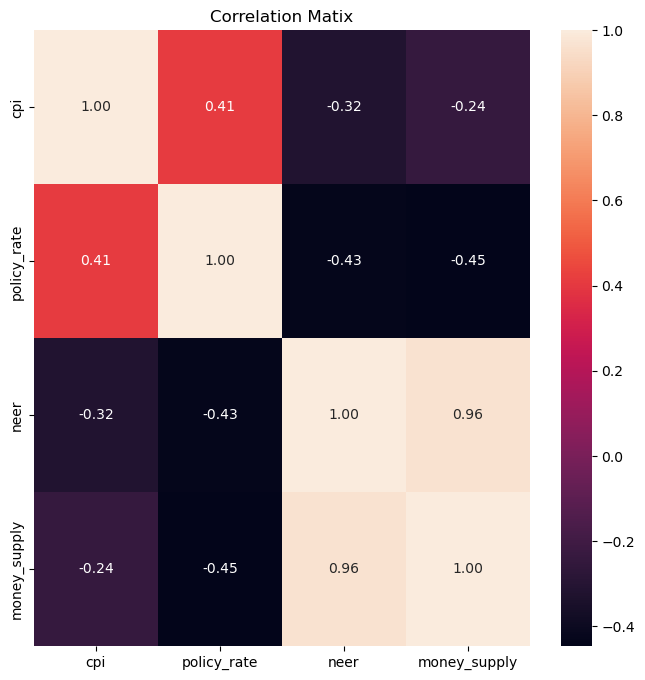

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_df, annot=True, fmt=".2f")
plt.title("Correlation Matix")
plt.show()